In [4]:
import numpy as np
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Flatten, Dense, Dropout, GlobalAveragePooling3D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load GeoJSON dataset
file_path = "D:\datascienEO\merged_data_our3months_6bands_3x3.geojson"  # <-- Update this with your actual file path
with open(file_path, "r") as f:
    data = json.load(f)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\wys39\AppData\Local\Temp\ipykernel_18936\3023408753.py:13: SyntaxWarning: invalid escape sequence '\d'
  file_path = "D:\datascienEO\merged_data_our3months_6bands_3x3.geojson"  # <-- Update this with your actual file path


In [5]:
# Extract features (Best combination: B4 (Red), B8 (NIR), B11 (SWIR)) and labels
features = []
labels = []

for feature in data["features"]:
    props = feature["properties"]
    
    # Extract selected bands
    red = np.array(props.get("B4_1", [[0]*3]*3))  # B4 (Red)
    nir = np.array(props.get("B8_1", [[0]*3]*3))  # B8 (NIR)
    swir = np.array(props.get("B11_1", [[0]*3]*3))  # B11 (SWIR)
    
    # Stack into a 3D representation (3x3x3)
    stacked_image = np.stack([red, nir, swir], axis=-1)  # Shape: (3,3,3)
    stacked_image = np.expand_dims(stacked_image, axis=-1)  # Shape: (3,3,3,1) for 3D-CNN
    
    # Extract target labels (species level classification)
    species = props.get("l3_species", "unknown")
    
    features.append(stacked_image)
    labels.append(species)

In [6]:
# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define 3D-CNN model
input_shape = (3, 3, 3, 1)
num_classes = len(np.unique(y_encoded))

inputs = Input(shape=input_shape)

x = Conv3D(32, (2, 2, 2), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv3D(64, (2, 2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling3D()(x)

# Fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3887 - loss: 1.9928 - val_accuracy: 0.4088 - val_loss: 1.8393
Epoch 2/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4036 - loss: 1.8916 - val_accuracy: 0.4007 - val_loss: 1.8446
Epoch 3/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4053 - loss: 1.8868 - val_accuracy: 0.4064 - val_loss: 1.8343
Epoch 4/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4082 - loss: 1.8853 - val_accuracy: 0.4231 - val_loss: 1.8081
Epoch 5/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3950 - loss: 1.8889 - val_accuracy: 0.3914 - val_loss: 1.8652
Epoch 6/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3979 - loss: 1.8712 - val_accuracy: 0.4205 - val_loss: 1.8030
Epoch 7/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4117 - loss: 1.8723 - val_accuracy: 0.4148 - val_loss: 1.8080
Epoch 8/30
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4067 - loss: 1.8645 - 

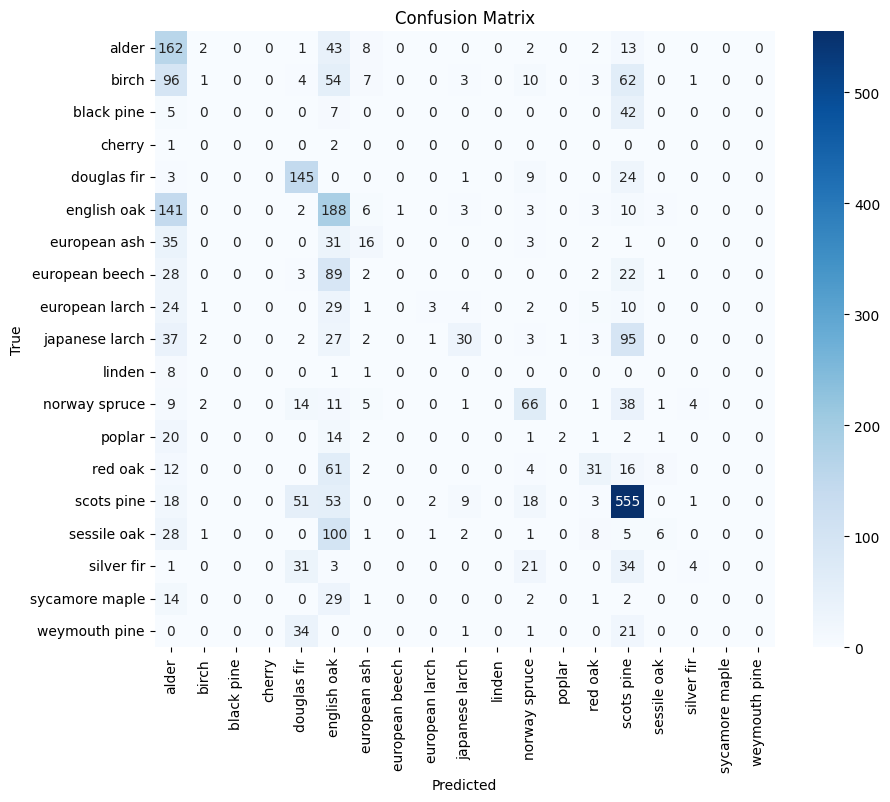

C:\Users\wys39\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wys39\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wys39\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                precision    recall  f1-score   support

         alder       0.25      0.70      0.37       233
         birch       0.11      0.00      0.01       241
    black pine       0.00      0.00      0.00        54
        cherry       0.00      0.00      0.00         3
   douglas fir       0.51      0.80      0.62       182
   english oak       0.25      0.52      0.34       360
  european ash       0.30      0.18      0.23        88
european beech       0.00      0.00      0.00       147
european larch       0.43      0.04      0.07        79
japanese larch       0.56      0.15      0.23       203
        linden       0.00      0.00      0.00        10
 norway spruce       0.45      0.43      0.44       152
        poplar       0.67      0.05      0.09        43
       red oak       0.48      0.23      0.31       134
    scots pine       0.58      0.78      0.67       710
   sessile oak       0.30      0.04      0.07       153
    silver fir       0.40      0.04      0.08  

In [12]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Save the model
model.save("3d_cnn_tree_species.h5")
